In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
import torch.functional as F
import plotly.graph_objects as go

from tqdm.notebook import tqdm
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset, DataLoader
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/Netflix Dataset.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


### CHECK IF WE HAVE GPU

In [4]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


### DATA CORRECTION AND MODIFICATION

In [9]:
df[["year", "month", "dates"]] = df["Date"].str.split("-", expand = True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,dates
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,05,23
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,05,24
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,05,28
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002,05,29
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002,05,30


In [10]:
df.shape

(5540, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5540 entries, 0 to 5539
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5540 non-null   object 
 1   Open       5540 non-null   float64
 2   High       5540 non-null   float64
 3   Low        5540 non-null   float64
 4   Close      5540 non-null   float64
 5   Adj Close  5540 non-null   float64
 6   Volume     5540 non-null   int64  
 7   year       5540 non-null   object 
 8   month      5540 non-null   object 
 9   dates      5540 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 432.9+ KB


## EDA

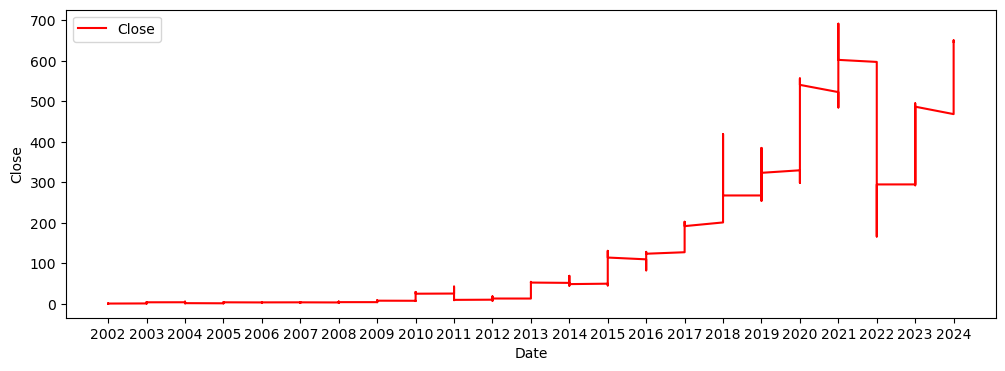

In [12]:
colors = ['red'] 
plt.figure(figsize=(12, 4))  # Adjust the size as needed
plt.plot(df['year'], df['Close'], color=colors[0], label="Close")
plt.xlabel('Date', fontsize=10)  # Corrected x-axis label function
plt.ylabel("Close", fontsize=10)  # Assuming col is defined elsewhere
plt.legend() # Add a legend for each subplot
plt.show() # Show the plot